<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Car_insurance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

DATA EXTRACTION


---

In [8]:
insurance = pd.read_csv("/content/drive/MyDrive/Raw_Data/Regression/car_insurance_premium_dataset.csv")
insurance.head(2), insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


(   Driver Age  Driver Experience  Previous Accidents  \
 0          56                 32                   4   
 1          46                 19                   0   
 
    Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
 0                         17                    2002       23   
 1                         21                    2025        0   
 
    Insurance Premium ($)  
 0                 488.35  
 1                 486.15  ,
 None)

DATA ANALYSIS

---

In [11]:
def plot_stype(data, column1, column2=None, plot_style='hist', style='whitegrid', **kwargs):
  sns.set_style(style)
  plt.figure(figsize=(15,5))
  if plot_style =='hist':
    sns.histplot(data=data, x=column1, kde=True, kde_kws=dict(cut=3), **kwargs)
  elif plot_style == 'box':
    sns.boxplot(data=data, x=column1, y=column2, **kwargs)
  elif plot_style == 'scatter':
    sns.scatterplot(data=data, x=column1, y=column2, **kwargs)
  else:
    raise ValueError(f"Unaccepted Plot Style {plot_style}")
  plt.show()

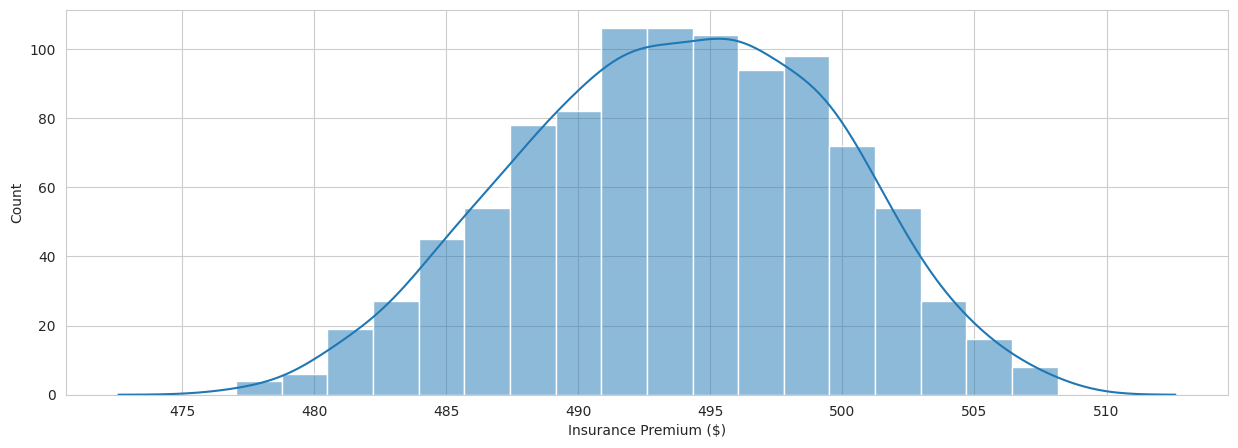

In [12]:
plot_stype(insurance, column1='Insurance Premium ($)', plot_style='hist', style='whitegrid')

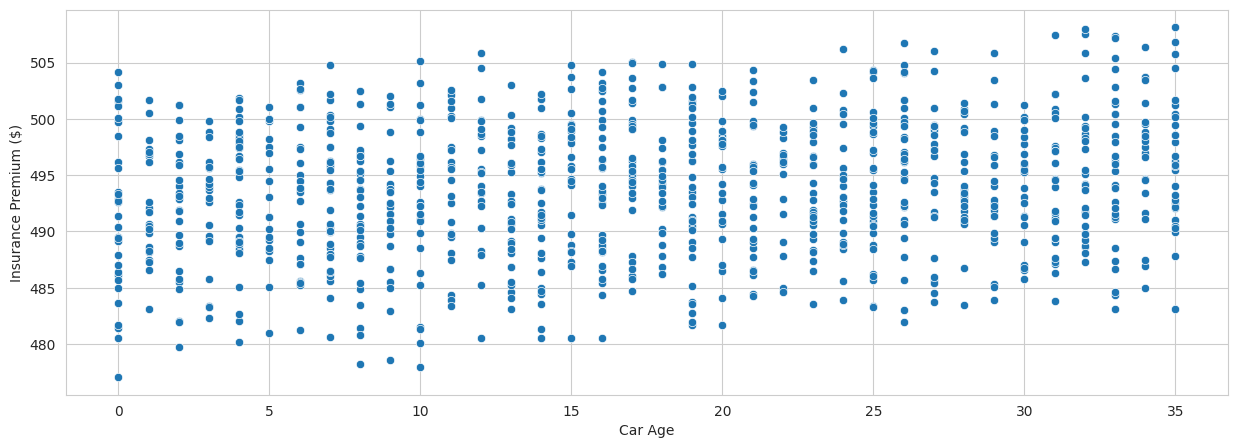

In [14]:
plot_stype(insurance, column1='Car Age' ,column2='Insurance Premium ($)', plot_style='scatter', style='whitegrid')

In [15]:
corr = insurance.corr()
print(corr['Insurance Premium ($)'].sort_values(ascending=False).round(3)*100)

Insurance Premium ($)       100.00
Previous Accidents           41.10
Car Age                      17.20
Annual Mileage (x1000 km)     2.20
Car Manufacturing Year      -17.20
Driver Age                  -77.70
Driver Experience           -80.30
Name: Insurance Premium ($), dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [17]:
X = insurance.iloc[:,:-1]
y = insurance.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:06<00:00,  6.17it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] Start training from score 493.662313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [20]:
models.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNetCV,0.99,0.99,0.48,0.14
PoissonRegressor,0.99,0.99,0.49,0.02
LassoCV,0.99,0.99,0.49,0.17
Ridge,0.99,0.99,0.49,0.02
SGDRegressor,0.99,0.99,0.49,0.01


TRYING K-MEANS Clustering

In [ ]:
wcss =[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

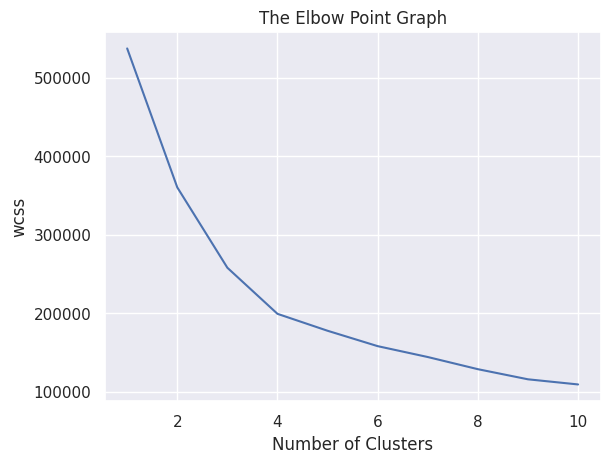

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[2 3 1 2 0 0 2 0 1 1 1 1 3 2 1 0 2 1 1 2 3 2 1 1 2 1 1 3 0 2 2 2 1 0 3 2 1
 2 0 3 1 2 0 0 3 1 1 1 1 0 3 3 0 2 1 2 3 1 1 2 2 1 1 1 3 0 2 0 2 3 2 0 3 0
 3 2 0 1 1 1 2 3 0 2 1 3 1 1 3 2 2 3 1 2 1 2 0 1 3 0 2 1 3 1 0 1 2 3 3 0 3
 2 2 2 0 1 1 0 2 3 3 3 2 3 2 3 3 1 2 3 1 2 2 3 1 0 0 0 3 1 2 3 0 1 0 3 2 0
 2 2 3 1 2 2 2 3 3 0 2 3 2 1 3 1 3 2 0 3 3 0 2 2 3 2 0 2 1 3 3 3 2 0 1 1 3
 1 3 0 0 3 1 3 3 3 2 2 1 3 3 1 2 0 2 1 0 3 1 0 1 3 1 2 2 3 1 1 1 3 3 3 0 2
 1 1 1 3 2 0 2 0 1 1 3 0 2 0 0 0 3 1 1 2 0 2 1 1 0 3 1 2 2 3 2 1 2 0 1 3 2
 3 2 3 3 3 0 0 3 2 0 1 3 1 1 3 3 1 2 2 1 3 1 0 1 0 2 0 1 1 2 3 2 1 2 3 2 2
 3 3 1 3 0 1 2 1 3 3 2 0 3 0 1 3 0 0 0 1 0 3 2 0 3 1 2 3 3 2 3 0 2 3 2 0 3
 2 3 3 2 0 2 0 1 2 0 2 0 2 2 3 0 3 3 3 2 2 3 3 2 3 0 3 2 3 1 1 2 3 3 0 2 3
 2 2 2 3 1 0 0 2 1 3 1 2 3 0 3 2 2 0 2 2 3 2 0 0 1 2 2 0 1 0 2 0 1 0 3 0 2
 3 1 3 2 0 3 0 1 2 1 0 2 3 2 1 3 3 1 3 1 1 2 2 3 3 2 2 0 0 2 3 0 0 1 3 3 2
 2 2 0 1 1 1 2 2 3 2 3 3 3 1 1 3 1 3 3 1 0 3 1 3 0 2 0 3 0 2 3 3 0 1 0 3 2
 2 1 3 3 2 2 3 1 1 1 3 3 

In [ ]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[  29.15668203    8.35483871    2.56682028   17.49769585 1997.73732719
    27.26267281]
 [  28.95454545    6.87603306    2.58677686   17.81818182 2016.13636364
     8.86363636]
 [  52.12992126   21.30314961    2.5511811    18.16141732 1998.48031496
    26.51968504]
 [  52.26480836   20.45644599    2.56794425   18.15679443 2016.05923345
     8.94076655]]
